# Etude statistique du dataset
Lien vers le dataset que nous avons choisi :


In [1]:
# Installation des librairies nécessaires :
! pip install pandas
! pip install matplotlib
! pip install pillow

In [2]:
# On a un fichier de texte parent_child_rel.txt contenant des informations les informations suivantes :
# {id du style architectural parent} {id du style architectural enfant}

# On a un autre fichier style_names.txt contenant :
# {id du style architectural} {nom du style architectural}

# On souhaite créer un dataframe contenant :
# -id du style architectural parent
# -nom du style architectural parent
# -id du style architectural enfant
# -nom du style architectural enfant

parent_child_rel = '../dataset_doc/parent_child_rel.txt'
style_names = '../dataset_doc/style_names.txt'

import pandas as pd

def get_parent_child_rel(rel_file, names_file):
    # On ouvre le fichier contenant les relations parent-enfant
    with open(rel_file, 'r') as f:
        rel = f.readlines()
    # On ouvre le fichier contenant les noms des styles architecturaux
    with open(names_file, 'r') as f:
        names = f.readlines()

    # On crée un dictionnaire contenant l'id et le nom des styles architecturaux
    names_dict = {}
    for name in names:
        name = name.split()
        names_dict[name[0]] = name[1]

    # On crée un dict contenant les relations parent-enfant
    rel_dict = {}
    for relation in rel:
        relation = relation.split()
        rel_dict[relation[0]] = relation[1]

    # On crée un dataframe contenant les relations parent-enfant avec deux colonnes : parent et child
    df = pd.DataFrame.from_dict(rel_dict, orient='index',columns=['child_id']).reset_index()
    # On renomme la colonne index en parent_id
    df = df.rename(columns={'index':'parent_id'})

    # On ajoute une colonne contenant le nom du style architectural enfant
    df['child_name'] = df['child_id'].map(names_dict)


    # On ajoute une colonne contenant le nom du style architectural parent
    df['parent_name'] = df['parent_id'].map(names_dict)

    # On réarrange les colonnes selon cet ordre : parent_id, parent_name, child_id, child_name
    df = df[['parent_id', 'parent_name', 'child_id', 'child_name']]

    # On retourne le dataframe
    return df
    


In [3]:
# On crée un dataframe contenant les relations parent-enfant
df_rel = get_parent_child_rel(parent_child_rel, style_names)
display(df_rel.head())

,parent_id,parent_name,child_id,child_name
0,Q750752,English,Q15609295,Perpendicular
1,Q176483,Gothic,Q695863,Brick
2,Q236122,Renaissance,Q502163,Renaissance
3,Q840829,Baroque,Q21564105,Rococo
4,Q46261,Romanesque,Q744373,Romanesque


In [4]:
test_txt = '../sets/wc4_test.txt'
train_txt = '../sets/wc4_train.txt'
trainval_txt = '../sets/wc4_trainval.txt'
val_txt = '../sets/wc4_val.txt'

# Chacun des fichiers texte ci-dessus contient :
#{nom du fichier image} {id du style architectural enfant}

In [5]:
# On créé une fonction qui prend en argument un fichier texte et qui retourne un dataframe contenant :
# -le nom du fichier image
# -l'id du style architectural parent

def get_img_parent_style(txt_file):
    # On ouvre le fichier texte
    with open(txt_file, 'r') as f:
        txt = f.readlines()

    # On crée un dictionnaire contenant le nom du fichier image et l'id du style architectural enfant
    txt_dict = {}
    for line in txt:
        line = line.split()
        txt_dict[line[0]] = line[1]

    # On crée un dataframe à partir du dictionnaire
    df_in = pd.DataFrame.from_dict(txt_dict, orient='index',columns=['parent_id']).reset_index()
    # On renomme la colonne index en img_name
    df_in = df_in.rename(columns={'index':'img_name'})

    # On compare les id du style architectural parent avec ceux du dataframe contenant les relations parent-enfant et on ajoute une colonne contenant le nom du style architectural parent
    df_in['parent_name'] = df_in['parent_id'].map(df_rel.set_index('parent_id')['parent_name'])

    # On retourne le dataframe
    return df_in

In [6]:
print('train set')
df_train = get_img_parent_style(train_txt)
display(df_train.head())
display(df_train.tail())

print('train eval set')
df_trainval = get_img_parent_style(trainval_txt)
display(df_trainval.head())
display(df_train.tail())

print('eval set')
df_val = get_img_parent_style(val_txt)
display(df_val.head())
display(df_train.tail())

print('test set')
df_test = get_img_parent_style(test_txt)
display(df_test.head())
display(df_train.tail())

train set


,img_name,parent_id,parent_name
0,Q21716735_wd0.jpg,Q840829,Baroque
1,Q20730233_wd0.jpg,Q840829,Baroque
2,Q2317509_wd0.jpg,Q840829,Baroque
3,Q1897745_wd0.jpg,Q840829,Baroque
4,Q20754132_wd0.jpg,Q840829,Baroque


,img_name,parent_id,parent_name
5833,Q15953605_wd0.jpg,Q46261,Romanesque
5834,Q15806440_wd0.jpg,Q46261,Romanesque
5835,Q5836639_wd0.jpg,Q46261,Romanesque
5836,Q20656847_wd0.jpg,Q46261,Romanesque
5837,Q2315657_wd0.jpg,Q46261,Romanesque


train eval set


,img_name,parent_id,parent_name
0,Q1415669_wd1.jpg,Q840829,Baroque
1,Q12030410_wd0.jpg,Q840829,Baroque
2,Q12031051_wd0.jpg,Q840829,Baroque
3,Q16320906_wd1.jpg,Q840829,Baroque
4,Q223413_wd0.jpg,Q840829,Baroque


,img_name,parent_id,parent_name
5833,Q15953605_wd0.jpg,Q46261,Romanesque
5834,Q15806440_wd0.jpg,Q46261,Romanesque
5835,Q5836639_wd0.jpg,Q46261,Romanesque
5836,Q20656847_wd0.jpg,Q46261,Romanesque
5837,Q2315657_wd0.jpg,Q46261,Romanesque


eval set


,img_name,parent_id,parent_name
0,Q1415669_wd1.jpg,Q840829,Baroque
1,Q12030410_wd0.jpg,Q840829,Baroque
2,Q12031051_wd0.jpg,Q840829,Baroque
3,Q16320906_wd1.jpg,Q840829,Baroque
4,Q223413_wd0.jpg,Q840829,Baroque


,img_name,parent_id,parent_name
5833,Q15953605_wd0.jpg,Q46261,Romanesque
5834,Q15806440_wd0.jpg,Q46261,Romanesque
5835,Q5836639_wd0.jpg,Q46261,Romanesque
5836,Q20656847_wd0.jpg,Q46261,Romanesque
5837,Q2315657_wd0.jpg,Q46261,Romanesque


test set


,img_name,parent_id,parent_name
0,Q2588857_wd0.jpg,Q840829,Baroque
1,Q626388_wd0.jpg,Q840829,Baroque
2,Q11985244_wd0.jpg,Q840829,Baroque
3,Q1561401_wd0.jpg,Q840829,Baroque
4,Q8406909_wd0.jpg,Q840829,Baroque


,img_name,parent_id,parent_name
5833,Q15953605_wd0.jpg,Q46261,Romanesque
5834,Q15806440_wd0.jpg,Q46261,Romanesque
5835,Q5836639_wd0.jpg,Q46261,Romanesque
5836,Q20656847_wd0.jpg,Q46261,Romanesque
5837,Q2315657_wd0.jpg,Q46261,Romanesque


,style_name,count
0,Gothic,3041
1,Romanesque,1653
2,Baroque,1080
3,Renaissance,64


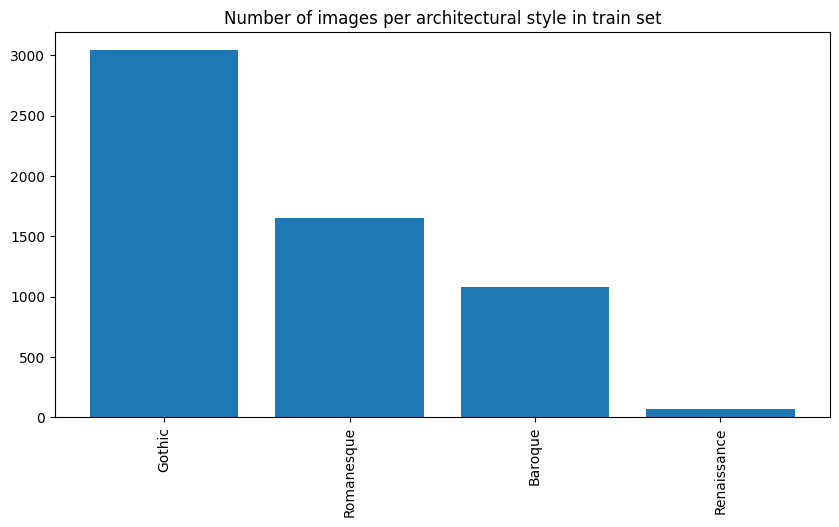

,style_name,count
0,Gothic,3093
1,Romanesque,1703
2,Baroque,1132
3,Renaissance,116


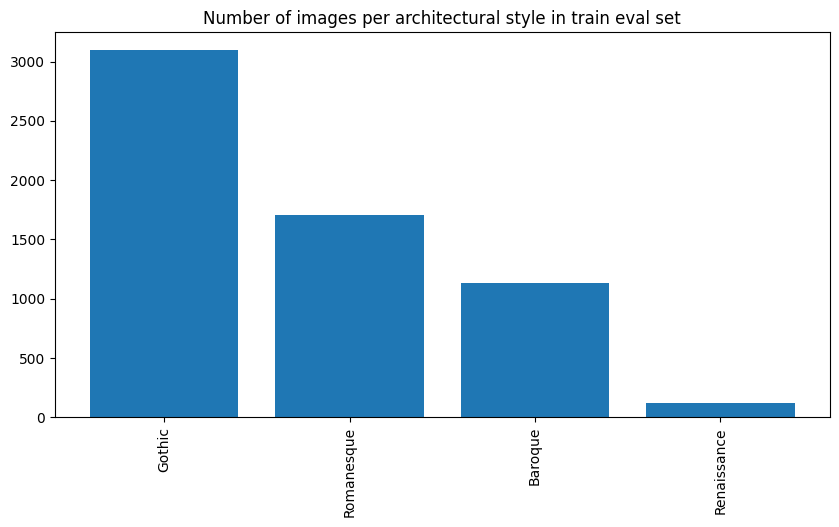

,style_name,count
0,Baroque,52
1,Renaissance,52
2,Gothic,52
3,Romanesque,50


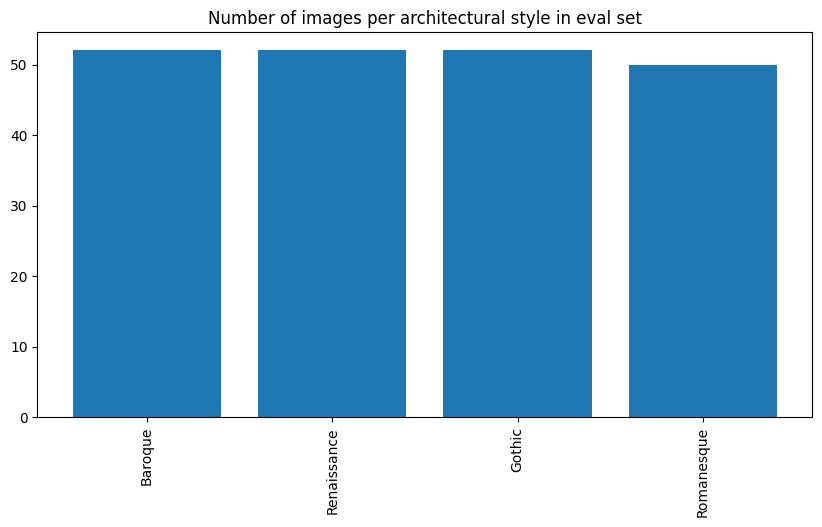

,style_name,count
0,Gothic,506
1,Romanesque,504
2,Baroque,372
3,Renaissance,100


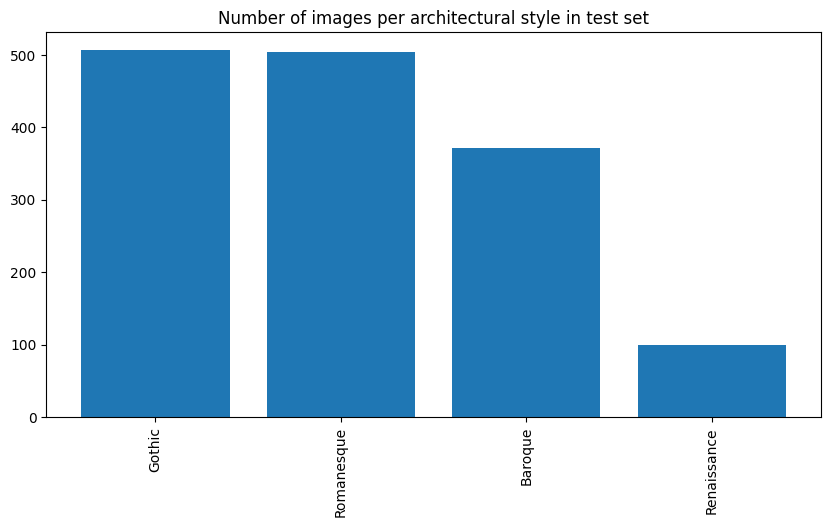

In [7]:
# On souhaite visualiser la distribution des styles architecturaux dans les différents sets
import matplotlib.pyplot as plt

# On souhaite aussi visualiser le nombre exact d'images par style architectural
def plot_style_distribution(df, set_name):
    # On crée un dictionnaire contenant le nombre d'images par style architectural
    style_count = df['parent_name'].value_counts().to_dict()

    # On crée un dataframe à partir du dictionnaire
    df_count = pd.DataFrame.from_dict(style_count, orient='index',columns=['count']).reset_index()
    # On renomme la colonne index en style_name
    df_count = df_count.rename(columns={'index':'style_name'})

    # On trie le dataframe par ordre décroissant
    df_count = df_count.sort_values(by='count', ascending=False)

    # On affiche le nombre d'images par style architectural
    display(df_count)

    # On affiche le nombre d'images par style architectural sous forme de diagramme en bâtons
    plt.figure(figsize=(10,5))
    plt.bar(df_count['style_name'], df_count['count'])
    plt.title(f'Number of images per architectural style in {set_name} set')
    plt.xticks(rotation=90)
    plt.show()

plot_style_distribution(df_train, 'train')
plot_style_distribution(df_trainval, 'train eval')
plot_style_distribution(df_val, 'eval')
plot_style_distribution(df_test, 'test')

In [8]:
# On regroupe tous les sets dans un seul dataframe
df_concat_sets = pd.concat([df_train, df_trainval, df_val, df_test])
display(df_concat_sets.head())

,img_name,parent_id,parent_name
0,Q21716735_wd0.jpg,Q840829,Baroque
1,Q20730233_wd0.jpg,Q840829,Baroque
2,Q2317509_wd0.jpg,Q840829,Baroque
3,Q1897745_wd0.jpg,Q840829,Baroque
4,Q20754132_wd0.jpg,Q840829,Baroque


,style_name,count
0,Gothic,6692
1,Romanesque,3910
2,Baroque,2636
3,Renaissance,332


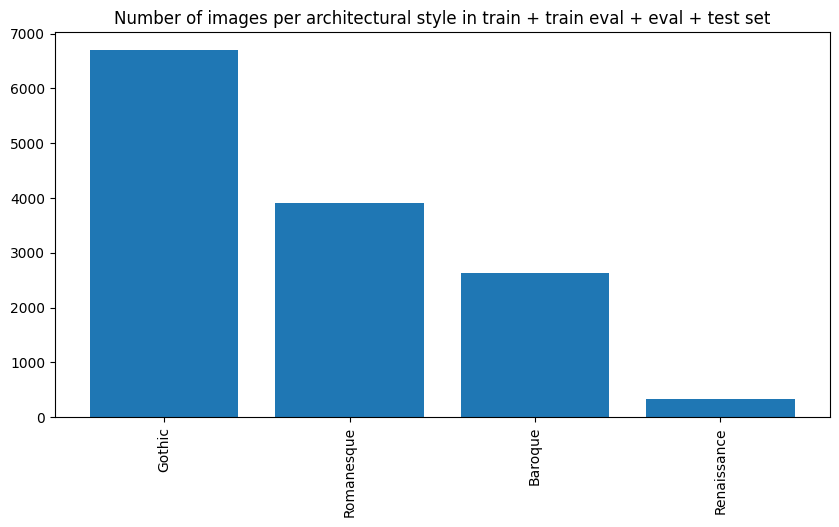

In [9]:
# On souhaite visualiser la distribution des styles architecturaux dans tous les sets
plot_style_distribution(df_concat_sets, 'train + train eval + eval + test')


In [10]:
# chemin vers le dataset :
dataset_path = '../../DATASET/'

## Compression des images

In [11]:
! pip install tqdm

In [12]:
# Nos images sont stockées dans un dossier images/images
# Ces images pèsent bien trop lourd pour être transformées en tenseurs et être traitées par le modèle
# On va donc les réduire à une taille de 256x256 pixels
# On va aussi les normaliser en divisant les valeurs des pixels par 255

# On sauvegarde les images dans un dossier images/images_256

# On crée une fonction qui prend en argument un dataframe et qui sauvegarde les images dans un dossier images/images_256

# On souhaite aussi que la fonction aie une barre de progression
from tqdm import tqdm

import os
from PIL import Image

def save_images(df):
    # On crée un dossier images/images_256 s'il n'existe pas déjà
    if not os.path.exists(dataset_path + 'images_256'):
        os.makedirs(dataset_path + 'images_256')
    
    # On affiche la barre de progression sous forme de pourcentage sur le notebook
    pbar = tqdm(total=len(df), position=0, leave=True)




    # On parcourt le dataframe
    for index, row in df.iterrows():
        # On ouvre l'image
        img = Image.open(dataset_path + 'images/' + row['img_name'])
        # On redimensionne l'image
        img = img.resize((256,256))
        # On normalise les valeurs des pixels
        img = img.point(lambda x: x/255)
        # On sauvegarde l'image
        img.save(dataset_path + 'images_256/' + row['img_name'])
        # On met à jour la barre de progression
        pbar.update(1)

    # On ferme la barre de progression
    pbar.close()
    



In [13]:
# On sauvegarde les images du train set
#save_images(df_train)


In [14]:
# On sauvegarde les images du train eval set
#save_images(df_trainval)

In [15]:
# On sauvegarde les images du eval set
#save_images(df_val)

In [16]:
# On sauvegarde les images du test set
#save_images(df_test)

## Partie II - Implémentation de Pytorch

In [17]:
! pip install torch

In [18]:
! pip install torchvision

In [19]:
# On transforme les images en tenseurs avec pytorch
import torch
from torchvision import transforms
from PIL import Image

# On crée une fonction qui prend en argument le chemin vers une image et qui retourne un tenseur
def img_to_tensor(img_path):
    # On ouvre l'image
    img = Image.open(img_path)
    # On transforme l'image en tenseur
    img_tensor = transforms.ToTensor()(img)
    # On retourne le tenseur
    return img_tensor

# On crée une fonction qui prend en argument un dataframe et qui retourne un dictionnaire contenant le nom du fichier image et le tenseur correspondant
def get_img_tensor_dict(df):
    # On crée un dictionnaire vide
    img_tensor_dict = {}
    # On parcourt le dataframe
    for index, row in df.iterrows():
        # On crée le chemin vers l'image
        img_path = dataset_path +'images_256/'+ row['img_name']
        # On transforme l'image en tenseur
        img_tensor = img_to_tensor(img_path)
        # On ajoute le nom du fichier image et le tenseur correspondant au dictionnaire
        img_tensor_dict[row['img_name']] = img_tensor
    # On retourne le dictionnaire
    return img_tensor_dict





On crée un dictionnaire contenant le nom du fichier image et le tenseur correspondant pour chaque set

In [20]:
img_tensor_dict_train = get_img_tensor_dict(df_train)

In [21]:
img_tensor_dict_trainval = get_img_tensor_dict(df_trainval)

In [22]:
img_tensor_dict_val = get_img_tensor_dict(df_val)

In [23]:
img_tensor_dict_test = get_img_tensor_dict(df_test)

In [24]:
# On visualise un exemple de tenseur
print('train set')
print('img_name :', df_val['img_name'][0])
print('img_tensor :')
display(img_tensor_dict_val[df_val['img_name'][0]])

train set
img_name : Q1415669_wd1.jpg
img_tensor :


tensor([[[0.0902, 0.0941, 0.1020,  ..., 0.2392, 0.2980, 0.3176],
         [0.0706, 0.0824, 0.1255,  ..., 0.0980, 0.1804, 0.3059],
         [0.1294, 0.0824, 0.0627,  ..., 0.1020, 0.1725, 0.3216],
         ...,
         [0.3294, 0.3686, 0.4745,  ..., 0.5255, 0.4706, 0.3333],
         [0.3961, 0.5059, 0.6000,  ..., 0.3569, 0.2588, 0.1647],
         [0.5490, 0.5608, 0.6314,  ..., 0.1804, 0.0824, 0.1255]],

        [[0.1176, 0.1216, 0.1412,  ..., 0.2353, 0.2784, 0.2980],
         [0.0980, 0.1098, 0.1647,  ..., 0.0941, 0.1686, 0.2863],
         [0.1569, 0.1098, 0.1020,  ..., 0.0980, 0.1608, 0.3098],
         ...,
         [0.3216, 0.3686, 0.4627,  ..., 0.4627, 0.3961, 0.2706],
         [0.3804, 0.4941, 0.5804,  ..., 0.3020, 0.1961, 0.1059],
         [0.5333, 0.5412, 0.6118,  ..., 0.1255, 0.0235, 0.0667]],

        [[0.1412, 0.1451, 0.1490,  ..., 0.2588, 0.3059, 0.3255],
         [0.1216, 0.1333, 0.1725,  ..., 0.1176, 0.1961, 0.3137],
         [0.1804, 0.1333, 0.1098,  ..., 0.1294, 0.1961, 0.

In [110]:
# On créé un dataset custom contenant les tenseurs des images et les labels
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, img_tensor_dict, df, label_map):
        self.img_tensor_dict = img_tensor_dict
        self.df = df
        self.label_map = label_map

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        # On récupère le nom du fichier image
        img_name = self.df['img_name'][index]
        # On récupère le tenseur correspondant
        img_tensor = self.img_tensor_dict[img_name]
        # On récupère le label
        label_str = self.df['parent_id'][index]
        label = self.label_map[label_str]
        # On retourne le tenseur et le label
        return img_tensor, label
    
    

In [111]:
# On créé une fonction qui mappe les labels aux noms des styles architecturaux
def create_label_map(df):
    unique_labels = df.iloc[:, 1].unique()
    label_map = {label: idx for idx, label in enumerate(unique_labels)}
    return label_map
    

In [114]:
# On affiiche le résultat du mapping
label_map = create_label_map(df_train)
display(label_map)

{'Q840829': 0, 'Q236122': 1, 'Q176483': 2, 'Q46261': 3}

In [116]:
# On crée un dataset custom pour le train set
dataset_train = CustomDataset(img_tensor_dict_train, df_train,label_map=label_map)

# On créé le DataLoader pour le train set
from torch.utils.data import DataLoader

batch_size = 4

dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

img_tensor :


tensor([[[0.4510, 0.4353, 0.4235,  ..., 0.3725, 0.3647, 0.3608],
         [0.4588, 0.4431, 0.4275,  ..., 0.3725, 0.3686, 0.3647],
         [0.4706, 0.4549, 0.4353,  ..., 0.3804, 0.3725, 0.3647],
         ...,
         [0.2824, 0.2941, 0.2471,  ..., 0.1412, 0.1333, 0.1255],
         [0.2588, 0.2627, 0.2471,  ..., 0.1294, 0.1137, 0.0980],
         [0.2667, 0.2667, 0.2745,  ..., 0.1294, 0.1020, 0.0784]],

        [[0.5333, 0.5176, 0.5059,  ..., 0.4863, 0.4784, 0.4745],
         [0.5412, 0.5255, 0.5098,  ..., 0.4863, 0.4824, 0.4784],
         [0.5529, 0.5373, 0.5176,  ..., 0.4941, 0.4863, 0.4784],
         ...,
         [0.2863, 0.2980, 0.2510,  ..., 0.1412, 0.1333, 0.1255],
         [0.2627, 0.2667, 0.2510,  ..., 0.1333, 0.1176, 0.1020],
         [0.2706, 0.2706, 0.2784,  ..., 0.1333, 0.1059, 0.0824]],

        [[0.7882, 0.7725, 0.7608,  ..., 0.7137, 0.7059, 0.7020],
         [0.7961, 0.7804, 0.7647,  ..., 0.7137, 0.7098, 0.7059],
         [0.8078, 0.7922, 0.7725,  ..., 0.7294, 0.7216, 0.

label : tensor(0)
label_str : Q840829
label_name : Baroque


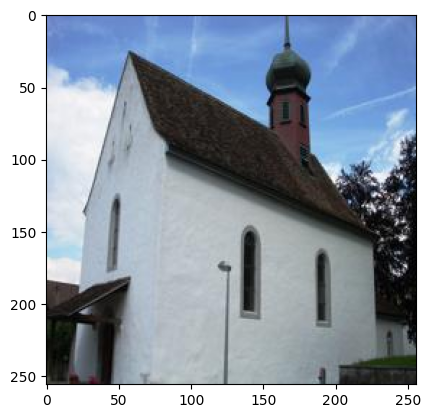

In [133]:
# On visualise la première image du train set et son label à partir du DataLoader
# On visualise le tenseur de l'image, et on reconstitue l'image à partir du tenseur
import matplotlib.pyplot as plt

for img_tensor, label in dataloader_train:
    print('img_tensor :')
    display(img_tensor[0])
    # On récupère le label
    print('label :', label[0])
    # On utilise le label_map pour récupérer le nom du style architectural
    label_str = [k for k,v in label_map.items() if v == label[0]][0]
    print('label_str :', label_str)
    # On print le nom du style architectural correspondant au label
    print('label_name :', df_train[df_train['parent_id'] == label_str]['parent_name'].values[0])
    # On reconstitue l'image à partir du tenseur
    plt.imshow(img_tensor[0].permute(1,2,0))
    break





## Partie III - Modèle personnalisé
Maintenant qu'un DataLoader a été créé avec les images et les labels correspondant, nous allons pouvoir implémenter notre premier CNN personnalisé.

In [84]:
! pip install scikit-learn

### Définition d'un modèle de CNN personnalisé (2 convolutions)

In [134]:
import torch.nn as nn
import torch.nn.functional as F

# On crée un modèle de réseau de neurones convolutif
class Net(nn.Module):
    def __init__(self, num_classes = 4):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1,stride=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1,stride=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*64*64, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)



    def forward(self, x):
        # Première couche de convolution suivie de ReLU et de max pooling
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        # Deuxième couche de convolution suivie de ReLU et de max pooling
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        # Redimensionner l'activation pour l'entrée de la première couche entièrement connectée
        x = x.view(-1, 32 * 64 * 64)
        # Trois couches entièrement connectées avec ReLU entre chacune
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    

In [135]:
# On teste le modèle
net = Net()

### Fonction d'entrainement

In [141]:
# On créé une fonction d'entrainement du modèle
# Cette fonction possède aussi une barre de progression sous forme de pourcentage avec tqdm
# Cette barre de progression se rempli à chaque epoch

import torch.optim as optim

def train_model(model, dataloader, epochs):

    # On définit la fonction de coût
    criterion = nn.CrossEntropyLoss()

    # On définit l'optimiseur
    optimizer = optim.SGD(model.parameters(), lr=0.001,momentum=0.9)

    

    # On parcourt les epochs
    for epoch in range(epochs):

       

        # On affiche l'epoch en cours
        print(f'epoch {epoch+1}/{epochs}')

        # On affiche la barre de progression sous forme de pourcentage sur le notebook
        pbar = tqdm(total=len(dataloader), position=0, leave=True)

        

        # On initialise la running_loss à 0
        running_loss = 0.0

        # On parcourt les batches du dataloader
        for i, data in enumerate(dataloader, 0):

            # On affiche la barre de progression sous forme de pourcentage sur le notebook
            pbar.update(1)

            # On récupère les tenseurs et les labels
            inputs, labels = data

            # On met les gradients à zéro
            optimizer.zero_grad()

            # On fait une prédiction
            outputs = model(inputs)

            # On calcule la fonction de coût
            loss = criterion(outputs, labels)

            # On calcule les gradients
            loss.backward()

            # On met à jour les paramètres
            optimizer.step()

            # Tous les 20 batches, on affiche :
            running_loss += loss.item()
            if i % 200 == 199:    # print every 20 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
                running_loss = 0.0

    # On ferme la barre de progression
    pbar.close()
    
    # On retourne le modèle
    return model





### Entrainement

In [142]:
# On entraine le modèle
train_model(net, dataloader_train, epochs=5)




epoch 1/5


 14%|█▍        | 203/1460 [00:15<01:36, 13.07it/s]

[1,   200] loss: 1.067


 28%|██▊       | 403/1460 [00:32<01:33, 11.31it/s]

[1,   400] loss: 1.060


 41%|████▏     | 603/1460 [00:49<01:15, 11.41it/s]

[1,   600] loss: 1.027


 55%|█████▌    | 803/1460 [01:08<01:03, 10.41it/s]

[1,   800] loss: 1.082


 69%|██████▊   | 1003/1460 [01:25<00:42, 10.87it/s]

[1,  1000] loss: 1.028


 82%|████████▏ | 1203/1460 [01:41<00:19, 13.51it/s]

[1,  1200] loss: 1.066


 96%|█████████▌| 1403/1460 [01:56<00:04, 13.85it/s]

[1,  1400] loss: 1.041


100%|██████████| 1460/1460 [02:05<00:00,  5.78it/s]

epoch 2/5


 14%|█▍        | 202/1460 [00:36<03:40,  5.72it/s]

[2,   200] loss: 1.050


 28%|██▊       | 403/1460 [00:54<01:19, 13.35it/s]

[2,   400] loss: 1.018


 41%|████▏     | 603/1460 [01:10<01:20, 10.61it/s]

[2,   600] loss: 1.048


 55%|█████▍    | 802/1460 [01:31<01:11,  9.21it/s]

[2,   800] loss: 1.051


 69%|██████▊   | 1003/1460 [01:50<00:42, 10.68it/s]

[2,  1000] loss: 1.030


 82%|████████▏ | 1203/1460 [02:08<00:21, 11.79it/s]

[2,  1200] loss: 1.050


 96%|█████████▌| 1403/1460 [02:26<00:05,  9.91it/s]

[2,  1400] loss: 1.024


100%|█████████▉| 1459/1460 [02:31<00:00, 12.96it/s]

epoch 3/5


 14%|█▍        | 202/1460 [00:15<01:37, 12.93it/s]

[3,   200] loss: 1.055


 28%|██▊       | 402/1460 [00:30<01:20, 13.10it/s]

[3,   400] loss: 1.022


 41%|████      | 602/1460 [00:46<01:11, 12.02it/s]

[3,   600] loss: 1.043


 55%|█████▍    | 802/1460 [01:06<00:59, 11.05it/s]

[3,   800] loss: 1.025


 69%|██████▊   | 1002/1460 [01:24<00:37, 12.23it/s]

[3,  1000] loss: 1.047


 82%|████████▏ | 1202/1460 [01:40<00:26,  9.90it/s]

[3,  1200] loss: 1.014


 96%|█████████▌| 1402/1460 [01:58<00:05, 11.42it/s]

[3,  1400] loss: 1.016


100%|██████████| 1460/1460 [02:03<00:00, 11.40it/s]

epoch 4/5


 14%|█▍        | 203/1460 [00:18<01:55, 10.91it/s]

[4,   200] loss: 1.040


 28%|██▊       | 402/1460 [00:37<01:57,  9.04it/s]

[4,   400] loss: 1.037


 41%|████      | 602/1460 [00:56<01:20, 10.71it/s]

[4,   600] loss: 1.030


 55%|█████▌    | 803/1460 [01:17<00:56, 11.63it/s]

[4,   800] loss: 1.025


 69%|██████▊   | 1003/1460 [01:35<00:43, 10.51it/s]

[4,  1000] loss: 1.013


 82%|████████▏ | 1203/1460 [01:54<00:22, 11.37it/s]

[4,  1200] loss: 0.993


 96%|█████████▌| 1403/1460 [02:11<00:04, 11.63it/s]

[4,  1400] loss: 1.012


100%|█████████▉| 1459/1460 [02:16<00:00, 11.65it/s]

epoch 5/5


 14%|█▍        | 203/1460 [00:17<01:47, 11.64it/s]

[5,   200] loss: 1.007


 28%|██▊       | 403/1460 [00:34<01:28, 11.89it/s]

[5,   400] loss: 1.001


 41%|████▏     | 603/1460 [00:51<01:13, 11.64it/s]

[5,   600] loss: 1.017


 55%|█████▍    | 802/1460 [01:10<01:06,  9.90it/s]

[5,   800] loss: 1.058


 69%|██████▊   | 1003/1460 [01:30<00:37, 12.08it/s]

[5,  1000] loss: 0.995


 82%|████████▏ | 1202/1460 [01:47<00:23, 10.96it/s]

[5,  1200] loss: 1.011


 96%|█████████▌| 1402/1460 [02:06<00:05, 10.43it/s]

[5,  1400] loss: 1.018


100%|██████████| 1460/1460 [02:12<00:00, 11.03it/s]


Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=131072, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)

### Tests d'accuracy

In [144]:
# On crée un dataset custom pour le train eval set
dataset_trainval = CustomDataset(img_tensor_dict_trainval, df_trainval,label_map=label_map)

# On créé le DataLoader pour le train eval set
dataloader_trainval = DataLoader(dataset_trainval, batch_size=batch_size, shuffle=True)

# On teste le modèle sur le train eval set
correct = 0

# On parcourt les batches du dataloader
for i, data in enumerate(dataloader_trainval, 0):
    # On récupère les tenseurs et les labels
    inputs, labels = data
    # On fait une prédiction
    outputs = net(inputs)
    # On récupère l'indice de la valeur maximale
    _, predicted = torch.max(outputs, 1)
    # On incrémente correct de 1 si la prédiction est correcte
    correct += (predicted == labels).sum().item()

# On affiche le pourcentage de prédictions correctes
print(f'Accuracy on train eval set : {correct / len(dataset_trainval) * 100:.2f}%')



Accuracy on train eval set : 53.79%


In [145]:
# On teste le modèle sur le test set
correct = 0

# On crée un dataset custom pour le test set
dataset_test = CustomDataset(img_tensor_dict_test, df_test,label_map=label_map)

# On créé le DataLoader pour le test set
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

# On parcourt les batches du dataloader
for i, data in enumerate(dataloader_test, 0):
    # On récupère les tenseurs et les labels
    inputs, labels = data
    # On fait une prédiction
    outputs = net(inputs)
    # On récupère l'indice de la valeur maximale
    _, predicted = torch.max(outputs, 1)
    # On incrémente correct de 1 si la prédiction est correcte
    correct += (predicted == labels).sum().item()	

# On affiche le pourcentage de prédictions correctes
print(f'Accuracy on test set : {correct / len(dataset_test) * 100:.2f}%')

Accuracy on test set : 36.64%
